In [30]:
%%time
import h5py
import numpy as np
import math
import matplotlib.pyplot  as pl
with h5py.File('../Input/images_training.h5','r') as H:
    data = np.copy(H['data']) #shape (30000, 28, 28)
with h5py.File('../Input/labels_training.h5','r') as H:
    label = np.copy(H['label']) #shape (30000, )
with h5py.File('../Input/images_testing.h5','r') as H:
    datatest = np.copy(H['data']) #shape (30000, 28, 28)
with h5py.File('../Input/labels_testing_2000.h5','r') as H:
    labeltest = np.copy(H['label']) #shape (30000, )
data = data.reshape(len(data), -1)
datatest = datatest.reshape(len(datatest), -1)
%run preprocessing.py
standard = StandardScaler()
standard.fit(data)
data = standard.transform(data)
datatest = standard.transform(datatest)
%run PCA.py
pca = PCA(n_components = 115) #80:40%, 60:38%, 40:37.65%, 100:43.85%, 110:44.05%, 112:44.25%, 113:44.3%, 114:44.25%, 115:44.55%,116:44.05%, 117:44.4%,118:44.05%, 120: 29.8%
pca.fit(data)
data_PCA = pca.transform(data)
datatest_PCA = pca.transform(datatest)

Wall time: 1min 3s


In [31]:
with h5py.File("../Input/data_PCA.h5", "w") as f:
     f.create_dataset("data_PCA", data=data_PCA)
with h5py.File("../Input/datatest_PCA.h5", "w") as f:
     f.create_dataset("datatest_PCA", data=datatest_PCA)   

In [32]:
import h5py
import numpy as np
import math
import matplotlib.pyplot  as pl
with h5py.File('../Input/data_PCA.h5','r') as H:
    data_PCA = np.copy(H['data_PCA']) #shape (30000, n)
with h5py.File('../Input/labels_training.h5','r') as H:
    label = np.copy(H['label']) #shape (30000, )
with h5py.File('../Input/datatest_PCA.h5','r') as H:
    datatest_PCA = np.copy(H['datatest_PCA']) #shape (30000, n)
with h5py.File('../Input/labels_testing_2000.h5','r') as H:
    labeltest = np.copy(H['label']) #shape (30000, )

In [33]:
%%time
%run GNB.py
gnb = GNB(10)

Wall time: 1.99 ms


In [34]:
%%time
gnb.fit(data_PCA,label)

Wall time: 61.8 ms


In [35]:
%%time

class_out = gnb.predict(datatest_PCA[0:2000])

correct=np.sum(class_out==labeltest)

print("Accuracy:  %8.5f%%" %(100*correct/2000))


Accuracy:  44.55000%
Wall time: 10.7 s


## Confusion Matrix

In [36]:
cm = np.zeros((10, 10), dtype='int')
for i in range(10): #prediction of each class，rows in the matrix
    for j in range(10): #real label of each class, columns in the matrix
        cm[j][i] = np.sum((class_out==i) & (labeltest == j))

In [37]:
cm # show Confusion Matrix

array([[ 64,   5,   4,  26,  24,  19,   5,  25,   2,   4],
       [  3, 141,   3,  24,   0,  19,   1,   0,   0,   0],
       [ 25,   5,  59,  32,  51,  25,   3,   6,   1,   3],
       [  3,  10,   1, 162,   4,   7,   1,   3,   0,   0],
       [ 12,   3,  23,  36, 119,  10,   3,   3,   1,   2],
       [  1,   0,   0,   7,   0, 127,   0,  71,   2,   6],
       [ 15,  15,   9,  49,  54,  25,  11,  16,   6,   0],
       [  0,   0,   0,   0,   0,  37,   0, 161,   0,   0],
       [ 28,   0,   6,   4,   9, 109,   7,   2,  24,  30],
       [  8,   0,   0,   2,   0,  99,   3,  46,   6,  23]])

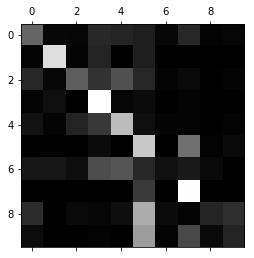

In [38]:
# visualization
import matplotlib.pyplot as plt
plt.matshow(cm, cmap=plt.cm.gray)
plt.show()
#present in gray value, bigger values are brighter

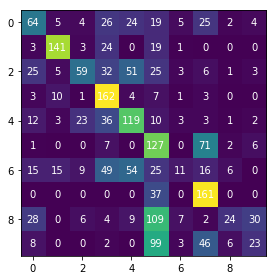

In [39]:
#another way to visulize with exact numbers
fig, ax = plt.subplots()
im = ax.imshow(cm)
for i in range(10):
    for j in range(10):
        text = ax.text(j, i, cm[i][j], ha='center', va='center', color='w')
fig.tight_layout()
plt.show()

## Error rate Matrix

In [40]:
error_matrix = cm / np.sum(cm, axis=1)
np.fill_diagonal(error_matrix, 0)
#error_matrix: the bigger value means more wrong predictions

In [41]:
error_matrix

array([[0.        , 0.02617801, 0.01904762, 0.13612565, 0.11320755,
        0.08878505, 0.025     , 0.12626263, 0.00913242, 0.02139037],
       [0.01685393, 0.        , 0.01428571, 0.12565445, 0.        ,
        0.08878505, 0.005     , 0.        , 0.        , 0.        ],
       [0.14044944, 0.02617801, 0.        , 0.16753927, 0.24056604,
        0.11682243, 0.015     , 0.03030303, 0.00456621, 0.01604278],
       [0.01685393, 0.05235602, 0.0047619 , 0.        , 0.01886792,
        0.03271028, 0.005     , 0.01515152, 0.        , 0.        ],
       [0.06741573, 0.01570681, 0.10952381, 0.18848168, 0.        ,
        0.04672897, 0.015     , 0.01515152, 0.00456621, 0.01069519],
       [0.00561798, 0.        , 0.        , 0.03664921, 0.        ,
        0.        , 0.        , 0.35858586, 0.00913242, 0.03208556],
       [0.08426966, 0.07853403, 0.04285714, 0.2565445 , 0.25471698,
        0.11682243, 0.        , 0.08080808, 0.02739726, 0.        ],
       [0.        , 0.        , 0.       

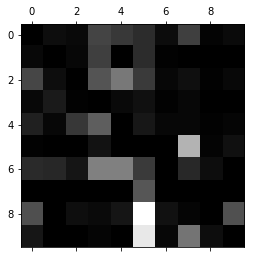

In [42]:
# visualization
import matplotlib.pyplot as plt
plt.matshow(error_matrix, cmap=plt.cm.gray)
plt.show()
#present in gray value, bigger values are brighter

#### So we can see that GNB is really weak in predicting the 5th: 'Sandal' because they were oftern predicted as the 8, 9th classes: 'Bag' and 'Ankle boot'